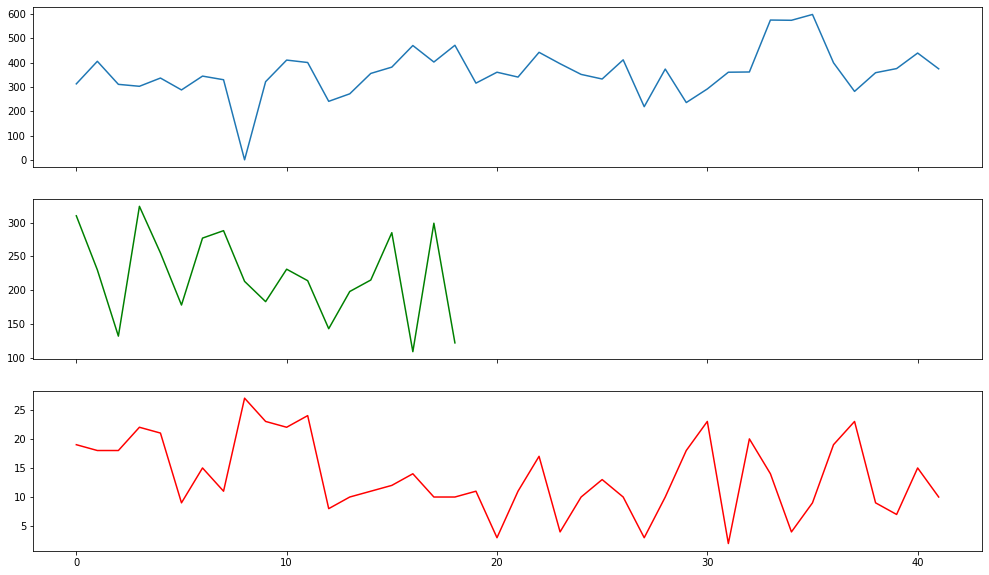


 Mean values:
 Confirmed daily          358.225
Recovered                246.500
Official deaths daily     13.600
dtype: float64

 Mean values:
 Confirmed daily          418.2
Recovered                207.9
Official deaths daily     13.0
dtype: float64


[362.0, 576.0, 575.0, 599.0, 400.0, 282.0, 359.0, 376.0, 440, 375]

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("covid19.csv")
data = data.fillna(0)
data = data.drop(["Source","Unofficial deaths daily"], axis = 1)
data_train = data[["Confirmed daily", "Recovered", "Official deaths daily"]]
data_train = data_train.iloc[-40:,:]

R_obs_w = list(data_train["Confirmed daily"]) + [440, 375]
O_obs_w = list(data_train["Recovered"]) + [299, 122]
Z_obs_w = list(data_train["Official deaths daily"]) + [15,10] # łącznie z 14 czerwca
O_obs_w = O_obs_w[23:]
fig, axes = plt.subplots(3,1, sharex=True, figsize=(17, 10))
axes[0].plot(range(len(R_obs_w)), R_obs_w )
axes[1].plot(range(len(O_obs_w)), O_obs_w ,"g")
axes[2].plot(range(len(Z_obs_w)), Z_obs_w, "r" )
plt.show()

print("\n Mean values:\n",data_train.mean())
print("\n Mean values:\n",data_train.iloc[-10:,:].mean())

R_obs_w[-10:]

In [20]:
from pmdarima.arima import auto_arima
stepwise_model_R = auto_arima(R_obs_w, start_p=1, start_q=1,
                           max_p=7, max_q=7, m=7,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

stepwise_model_Z = auto_arima(Z_obs_w, start_p=1, start_q=1,
                           max_p=7, max_q=7, m=7,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

stepwise_model_O = auto_arima(O_obs_w, start_p=1, start_q=1,
                           max_p=7, max_q=7, m=7,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)


Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,7) [intercept=True]; AIC=434.059, BIC=441.691, Time=0.399 seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=True]; AIC=450.256, BIC=453.309, Time=0.012 seconds
Fit ARIMA(1,1,0)x(1,1,0,7) [intercept=True]; AIC=444.162, BIC=450.268, Time=0.129 seconds
Fit ARIMA(0,1,1)x(0,1,1,7) [intercept=True]; AIC=435.726, BIC=441.832, Time=0.281 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=False]; AIC=448.303, BIC=449.829, Time=0.014 seconds
Fit ARIMA(1,1,1)x(0,1,0,7) [intercept=True]; AIC=444.385, BIC=450.490, Time=0.152 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,1)x(1,1,1,7) [intercept=True]; AIC=436.059, BIC=445.218, Time=0.621 seconds
Near non-i

Fit ARIMA(2,1,1)x(0,1,1,7) [intercept=True]; AIC=133.347, BIC=135.734, Time=0.376 seconds
Near non-invertible roots for order (2, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,2)x(0,1,1,7) [intercept=True]; AIC=135.942, BIC=138.330, Time=0.315 seconds
Near non-invertible roots for order (1, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(0,1,1,7) [intercept=True]; AIC=136.892, BIC=138.086, Time=0.123 seconds
Near non-invertible roots for order (0, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA(0,1,2)x(0,1,1,7) [intercept=True]; AIC=132.237, BIC=134.227, Time=0.317 seconds
Near non-invertible roots for order (0, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIM

      Prediction
43.0  440.980600
44.0  372.159854
45.0  406.344323
46.0  426.406794
47.0  441.144536
48.0  441.843337
49.0  418.322510
50.0  465.448423
51.0  390.427940
52.0  422.502709
53.0  441.777365
54.0  456.154522
55.0  456.630816
56.0  432.932110
57.0  479.894566
58.0  404.715289
59.0  436.632768
60.0  455.750623
61.0  469.971136
62.0  470.290837
63.0  446.435554
64.0  493.241439
65.0  417.905591
66.0  449.666502
67.0  468.627787
68.0  482.691732
69.0  482.854863
70.0  458.843011
71.0  505.492327
72.0  429.999911


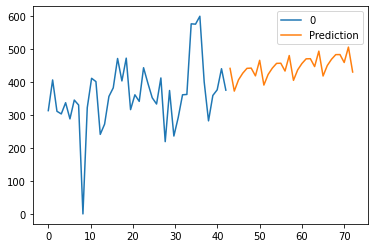

In [21]:
stepwise_model_R.fit(R_obs_w)
koniec = 42
future = 30
future_forecast = stepwise_model_R.predict(n_periods=future)
future_forecast = pd.DataFrame(future_forecast,index = np.linspace(koniec+1,koniec+future,future),columns=["Prediction"])
pd.concat([pd.DataFrame(R_obs_w[-koniec:],index = np.linspace(0,koniec,koniec)),future_forecast],axis=1).plot()

print(future_forecast)

      Prediction
21.0   12.617420
22.0   20.970106
23.0   22.226919
24.0   12.693744
25.0   17.247050
26.0   17.434007
27.0   12.123189
28.0   16.549084
29.0   25.099918
30.0   26.554878


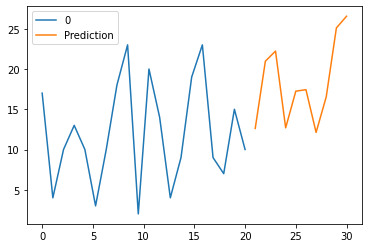

In [22]:
stepwise_model_Z.fit(Z_obs_w)
koniec = 20
future = 10
future_forecast = stepwise_model_Z.predict(n_periods=future)
future_forecast = pd.DataFrame(future_forecast,index = np.linspace(koniec+1,koniec+future,future),columns=["Prediction"])
pd.concat([pd.DataFrame(Z_obs_w[-koniec:],index = np.linspace(0,koniec,koniec)),future_forecast],axis=1).plot()

print(future_forecast)

      Prediction
20.0  150.438883
21.0  159.200155
22.0  198.359793
23.0  258.405118
24.0   87.528714
25.0  275.572779
26.0   99.940817
27.0  128.187070
28.0  137.488475
29.0  176.844201
30.0  237.247148
31.0   66.652524
32.0  255.013978
33.0   79.682685
34.0  108.237458
35.0  117.843697
36.0  157.505987
37.0  218.214687
38.0   47.926195
39.0  236.593604
40.0   61.568350
41.0   90.429121
42.0  100.341378
43.0  140.309676
44.0  201.324389
45.0   31.341908
46.0  220.315329
47.0   45.596086
48.0   74.762869
49.0   84.981138


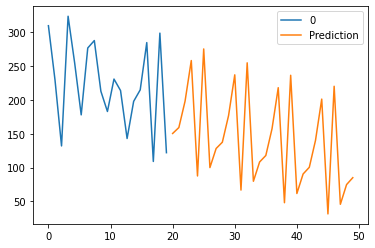

In [24]:
stepwise_model_O.fit(O_obs_w)
koniec = 19
future = 30
future_forecast = stepwise_model_O.predict(n_periods=future)
future_forecast = pd.DataFrame(future_forecast,index = np.linspace(koniec+1,koniec+future,future),columns=["Prediction"])
pd.concat([pd.DataFrame(O_obs_w[-koniec:],index = np.linspace(0,koniec,koniec)),future_forecast],axis=1).plot()

print(future_forecast)